In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway, kruskal
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrix

In [29]:
df = pd.read_excel('mau.xlsx')
df.head()

,gender,age,Hypertension_Comorbidities,Type_2_Diabetes,sepsis,AKI,WBC,RBC,RDW,hemoglobin,...,ALP,AST,PTT,PT,INR,survival_time_28,survival_time_90,status,status_90,TyG
0,F,53,0,1,0,0,3.7,3.28,13.9,9.1,...,93,30.0,23.5,13.9,1.3,28,90,0,0,8.69
1,M,46,1,1,0,0,15.2,3.53,15.2,10.3,...,50,14.0,27.7,13.3,1.2,28,90,0,0,10.01
2,M,56,0,0,1,1,7.3,3.12,15.3,8.9,...,134,110.0,29.9,16.6,1.5,28,90,0,0,9.93
3,M,32,0,0,0,0,13.3,4.19,14.0,12.9,...,50,51.0,27.3,15.1,1.3,28,90,0,0,8.46
4,F,60,1,0,0,0,9.1,3.51,14.8,9.1,...,145,17.0,28.3,11.3,1.0,28,90,0,0,8.01


In [30]:
df.isna().sum()

gender                        0
age                           0
Hypertension_Comorbidities    0
Type_2_Diabetes               0
sepsis                        0
AKI                           0
WBC                           0
RBC                           0
RDW                           0
hemoglobin                    0
platelets                     0
ANION_GAP                     0
BICARBONATE                   0
Calcium                       0
Cl                            0
K                             0
CREATININE                    0
glucose                       0
Triglycerides                 0
ALT                           0
ALP                           0
AST                           0
PTT                           0
PT                            0
INR                           0
survival_time_28              0
survival_time_90              0
status                        0
status_90                     0
TyG                           0
dtype: int64

In [31]:
df.dropna()  # bỏ dòng có NaN
df.head(2)

,gender,age,Hypertension_Comorbidities,Type_2_Diabetes,sepsis,AKI,WBC,RBC,RDW,hemoglobin,...,ALP,AST,PTT,PT,INR,survival_time_28,survival_time_90,status,status_90,TyG
0,F,53,0,1,0,0,3.7,3.28,13.9,9.1,...,93,30.0,23.5,13.9,1.3,28,90,0,0,8.69
1,M,46,1,1,0,0,15.2,3.53,15.2,10.3,...,50,14.0,27.7,13.3,1.2,28,90,0,0,10.01


In [32]:
df['TyG_group'] = pd.qcut(x= df['TyG'], q=4, labels= ['Q1', 'Q2', 'Q3', 'Q4'])
df.head(2)

,gender,age,Hypertension_Comorbidities,Type_2_Diabetes,sepsis,AKI,WBC,RBC,RDW,hemoglobin,...,AST,PTT,PT,INR,survival_time_28,survival_time_90,status,status_90,TyG,TyG_group
0,F,53,0,1,0,0,3.7,3.28,13.9,9.1,...,30.0,23.5,13.9,1.3,28,90,0,0,8.69,Q2
1,M,46,1,1,0,0,15.2,3.53,15.2,10.3,...,14.0,27.7,13.3,1.2,28,90,0,0,10.01,Q4


In [33]:
# races = {
#     'UNKNOWN': 'Others',
#     'UNABLE TO OBTAIN': 'Others',
#     'ASIAN - CHINESE': 'Others',
#     'ASIAN - SOUTH EAST ASIAN': 'Others',
#     'ASIAN - ASIAN INDIAN': 'Others',
#     'ASIAN - KOREAN': 'Others',
#     'ASIAN': 'Others',
#     'HISPANIC OR LATINO': 'Others',
#     'HISPANIC/LATINO - PUERTO RICAN': 'Others',
#     'HISPANIC/LATINO - GUATEMALAN': 'Others',
#     'HISPANIC/LATINO - DOMINICAN': 'Others',
#     'HISPANIC/LATINO - MEXICAN': 'Others',
#     'HISPANIC/LATINO - SALVADORAN': 'Others',
#     'HISPANIC/LATINO - CENTRAL AMERICAN': 'Others',
#     'HISPANIC/LATINO - CUBAN': 'Others',
#     'HISPANIC/LATINO - COLUMBIAN': 'Others',
#     'HISPANIC/LATINO - HONDURAN': 'Others',
#     'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Others',
#     'AMERICAN INDIAN/ALASKA NATIVE': 'Others',
#     'MULTIPLE RACE/ETHNICITY': 'Others',
#     'SOUTH AMERICAN': 'Others',
#     'OTHER': 'Others',
#     'PATIENT DECLINED TO ANSWER': 'Others',
#     'WHITE': 'White',
#     'WHITE - OTHER EUROPEAN': 'White',
#     'WHITE - RUSSIAN': 'White',
#     'WHITE - EASTERN EUROPEAN': 'White',
#     'WHITE - BRAZILIAN': 'White',
#     'PORTUGUESE': 'White',
#     'BLACK/AFRICAN AMERICAN': 'Black',
#     'BLACK/CARIBBEAN ISLAND': 'Black',
#     'BLACK/CAPE VERDEAN': 'Black',
#     'BLACK/AFRICAN': 'Black',
# }
# df['race'] = df['race'].map(races)

In [34]:
df.columns

Index(['gender', 'age', 'Hypertension_Comorbidities', 'Type_2_Diabetes',
       'sepsis', 'AKI', 'WBC', 'RBC', 'RDW', 'hemoglobin', 'platelets',
       'ANION_GAP', 'BICARBONATE', 'Calcium', 'Cl', 'K', 'CREATININE',
       'glucose', 'Triglycerides', 'ALT', 'ALP', 'AST', 'PTT', 'PT', 'INR',
       'survival_time_28', 'survival_time_90', 'status', 'status_90', 'TyG',
       'TyG_group'],
      dtype='object')

In [61]:

# 2. Chia nhóm TyG theo tứ phân vị
# -------------------------------
df['TyG_group'] = pd.qcut(df['TyG'], 4, labels=['Q1','Q2','Q3','Q4'])
df['TyG_numeric'] = df['TyG_group'].cat.codes + 1  # cho test p-trend

# -------------------------------
# 3. Các biến điều chỉnh
# -------------------------------
covars = ['age','gender','WBC', 'RBC', 'RDW', 'hemoglobin', 'platelets',
       'ANION_GAP', 'BICARBONATE', 'Calcium', 'Cl', 'K', 'CREATININE',
        'ALT', 'ALP', 'AST', 'PTT', 'PT', 'INR']

# -------------------------------
# 4. Hàm tính OR và CI
# -------------------------------
def get_or_ci(model, var):
    coef = model.params[var]
    se = model.bse[var]
    OR = np.exp(coef)
    CI_low = np.exp(coef - 1.96 * se)
    CI_high = np.exp(coef + 1.96 * se)
    return f"{OR:.3f}({CI_low:.3f}–{CI_high:.3f})"

# -------------------------------
# 5. Các mô hình hồi quy logistic
# -------------------------------
m1 = smf.logit("sepsis ~ TyG", data=df).fit(disp=False)
m2 = smf.logit("sepsis ~ TyG + age + gender", data=df).fit(disp=False)
m3 = smf.logit("sepsis ~ TyG + " + " + ".join(covars), data=df).fit(disp=False)

# Quartile models (Q1 = ref)
m1_q = smf.logit("sepsis ~ C(TyG_group, Treatment(reference='Q1'))", data=df).fit(disp=False)
m2_q = smf.logit("sepsis ~ C(TyG_group, Treatment(reference='Q1')) + age + gender", data=df).fit(disp=False)
m3_q = smf.logit("sepsis ~ C(TyG_group, Treatment(reference='Q1')) + " + " + ".join(covars), data=df).fit(disp=False)

# -------------------------------
# 6. Hàm trích xuất OR theo nhóm TyG
# -------------------------------
def extract_quartiles(model):
    out = {'Q1': 'Ref'}
    for var in model.params.index:
        if "C(TyG_group" in var:
            # var dạng: C(TyG_group, Treatment(reference='Q1'))[T.Q2]
            grp = var.split('.')[-1].replace(']', '').replace('T.', '')
            out[grp] = get_or_ci(model, var)
    # Đảm bảo đủ thứ tự
    for q in ['Q2', 'Q3', 'Q4']:
        if q not in out:
            out[q] = ''
    return out

q1 = extract_quartiles(m1_q)
q2 = extract_quartiles(m2_q)
q3 = extract_quartiles(m3_q)

# -------------------------------
# 7. P for trend
# -------------------------------
p1 = smf.logit("sepsis ~ TyG_numeric", data=df).fit(disp=False).pvalues['TyG_numeric']
p2 = smf.logit("sepsis ~ TyG_numeric + age + gender", data=df).fit(disp=False).pvalues['TyG_numeric']
p3 = smf.logit("sepsis ~ TyG_numeric + " + " + ".join(covars), data=df).fit(disp=False).pvalues['TyG_numeric']

def format_p(p):
    return "<0.001" if p < 0.001 else f"{p:.3f}"

# -------------------------------
# 8. Tạo bảng kết quả như Table 2
# -------------------------------
table = pd.DataFrame({
    'Model 1': [
        get_or_ci(m1, 'TyG'),
        q1['Q1'], q1['Q2'], q1['Q3'], q1['Q4'],
        format_p(p1)
    ],
    'Model 2': [
        get_or_ci(m2, 'TyG'),
        q2['Q1'], q2['Q2'], q2['Q3'], q2['Q4'],
        format_p(p2)
    ],
    'Model 3': [
        get_or_ci(m3, 'TyG'),
        q3['Q1'], q3['Q2'], q3['Q3'], q3['Q4'],
        format_p(p3)
    ]
}, index=[
    'TyG index', 'Q1', 'Q2', 'Q3', 'Q4', 'P for trend'
])

# print("\n===== Table 2. Association between TyG index and Sepsis =====\n")
# print(table.to_string())
table


,Model 1,Model 2,Model 3
TyG index,1.951(1.585–2.401),2.058(1.654–2.561),1.704(1.299–2.234)
Q1,Ref,Ref,Ref
Q2,1.860(1.107–3.125),1.824(1.084–3.071),1.684(0.917–3.091)
Q3,2.873(1.735–4.757),2.990(1.794–4.984),2.431(1.333–4.432)
Q4,4.935(2.994–8.133),5.423(3.235–9.090),3.168(1.690–5.940)
P for trend,<0.001,<0.001,<0.001


C:\Users\nam09\AppData\Local\Temp\ipykernel_5504\2296286163.py:55: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  X1 = dmatrix(m1.model.data.design_info.builder, df_pred1, return_type='dataframe')
C:\Users\nam09\AppData\Local\Temp\ipykernel_5504\2296286163.py:56: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  X2 = dmatrix(m2.model.data.design_info.builder, df_pred2, return_type='dataframe')


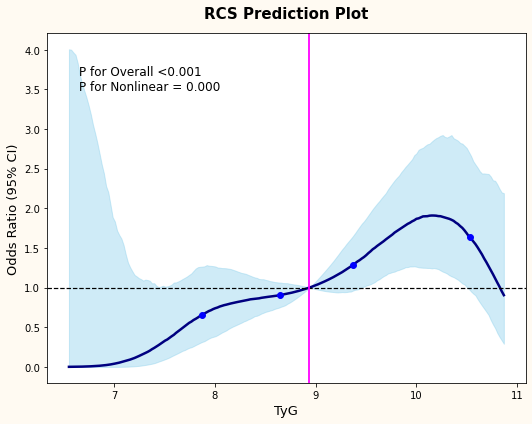

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from scipy import stats

# ========================================
# 1️⃣ Chuẩn bị dữ liệu
# df: phải có các cột 'TyG', 'sepsis', và covariates
# ========================================
covars = ['age','gender','WBC', 'RBC', 'RDW', 'hemoglobin', 'platelets',
           'ANION_GAP', 'BICARBONATE', 'Calcium', 'Cl', 'K', 'CREATININE',
           'ALT', 'ALP', 'AST', 'PTT', 'PT', 'INR']

# ========================================
# 2️⃣ Xác định spline cho TyG
# ========================================

knots = np.percentile(df['TyG'], [5, 35, 65, 95])
inner_knots = knots[1:-1]  # 3 knot ở giữa
spline_formula = (
    f"bs(TyG, knots=({inner_knots[0]}, {inner_knots[1]}), "
    f"degree=3, include_intercept=False)"
)


# ========================================
# 3️⃣ Fit hai mô hình logistic
# ========================================
# Unadjusted
m1 = smf.logit(f"sepsis ~ {spline_formula}", data=df).fit(disp=False)

# Adjusted
formula_adj = f"sepsis ~ {spline_formula} + " + " + ".join(covars)
m2 = smf.logit(formula_adj, data=df).fit(disp=False)

# ========================================
# 4️⃣ Tạo df dự đoán
# ========================================
TyG_seq = np.linspace(df['TyG'].min(), df['TyG'].max(), 200)
df_pred1 = pd.DataFrame({'TyG': TyG_seq})

df_pred2 = df_pred1.copy()
for c in covars:
    if df[c].dtype.kind in 'biufc':
        df_pred2[c] = df[c].median()
    else:
        df_pred2[c] = df[c].mode()[0]

# ========================================
# 5️⃣ Tạo ma trận thiết kế (avoid NameError)
# ========================================
X1 = dmatrix(m1.model.data.design_info.builder, df_pred1, return_type='dataframe')
X2 = dmatrix(m2.model.data.design_info.builder, df_pred2, return_type='dataframe')

# Điểm tham chiếu (median)
ref_idx = np.argmin(abs(TyG_seq - np.median(df['TyG'])))

# ========================================
# 6️⃣ Hàm bootstrap OR ± 95% CI
# ========================================
def bootstrap_or(model, X_pred, ref_idx, n_boot=1000, seed=42):
    np.random.seed(seed)
    params = model.params.values
    cov = model.cov_params().values
    n = X_pred.shape[0]

    boot_odds = np.zeros((n, n_boot))
    for i in range(n_boot):
        sample_params = np.random.multivariate_normal(params, cov)
        lin_pred = np.dot(X_pred.values, sample_params)
        prob = 1 / (1 + np.exp(-lin_pred))
        boot_odds[:, i] = prob / prob[ref_idx]

    odds = np.median(boot_odds, axis=1)
    ci_low = np.percentile(boot_odds, 2.5, axis=1)
    ci_high = np.percentile(boot_odds, 97.5, axis=1)
    return odds, ci_low, ci_high

# Tính OR & CI
odds1, ci1_low, ci1_high = bootstrap_or(m1, X1, ref_idx)
odds2, ci2_low, ci2_high = bootstrap_or(m2, X2, ref_idx)

# ========================================
# 7️⃣ Kiểm định phi tuyến (Adjusted model)
# ========================================
m_lin = smf.logit("sepsis ~ TyG", data=df).fit(disp=False)
LR_nonlin = 2 * (m2.llf - m_lin.llf)
df_diff = m2.df_model - m_lin.df_model
p_nonlin = stats.chi2.sf(LR_nonlin, df_diff)

# ========================================
# 8️⃣ Vẽ biểu đồ OR ± 95% CI (giống hình mẫu)
# ========================================
plt.figure(figsize=(7.5, 6), facecolor="#fffaf2")  # nền sáng dịu

# --- Vẽ đường OR và CI ---
plt.plot(TyG_seq, odds2, color='navy', linewidth=2.5)
plt.fill_between(TyG_seq, ci2_low, ci2_high, color='skyblue', alpha=0.4)

# --- Đường tham chiếu ---
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.2)
plt.axvline(x=TyG_seq[ref_idx], color='magenta', linestyle='-', linewidth=1.8)

# --- Thêm các điểm spline (minh họa) ---
knots_show = np.percentile(df['TyG'],  [5, 35, 65, 95])
plt.scatter(knots_show, np.interp(knots_show, TyG_seq, odds2),
            color='blue', s=35, zorder=5)

# --- Cài đặt trục và nhãn ---
plt.xlabel("TyG", fontsize=13)
plt.ylabel("Odds Ratio (95% CI)", fontsize=13)
plt.title("RCS Prediction Plot", fontsize=15, weight='bold', pad=15)

# --- Thêm text p-value ---
plt.text(df["TyG"].min()+0.1,
         ci2_high.max()*0.95,
         f"P for Overall <0.001\nP for Nonlinear = {p_nonlin:.3f}",
         fontsize=12, ha='left', va='top')

plt.grid(False)
plt.tight_layout()
plt.show()



# Phân tích nhóm con 

In [37]:
# Tạo lại phân nhóm TyG nếu chưa có
df['TyG_group'] = pd.qcut(df['TyG'], 4, labels=['Q1','Q2','Q3','Q4'])

# Biến số thứ tự để test p-trend
df['TyG_numeric'] = df['TyG_group'].cat.codes + 1


In [38]:
def get_or_ci(model, var):
    coef = model.params[var]
    se   = model.bse[var]
    OR = np.exp(coef)
    CI_low = np.exp(coef - 1.96*se)
    CI_high = np.exp(coef + 1.96*se)
    return f"{OR:.3f}({CI_low:.3f}–{CI_high:.3f})"


In [39]:
df['age_group'] = np.where(df['age'] >= 65, '>=65', '<65')
df['gender_group'] = np.where(df['gender'] == 1, 'Male', 'Female')
df['htn_group'] = np.where(df['Hypertension_Comorbidities'] == 1, 'Yes', 'No')
df['dm_group'] = np.where(df['Type_2_Diabetes'] == 1, 'Yes', 'No')


In [40]:
subgroups = {
    'Age': ('age_group', ['>=65', '<65']),
    'Gender': ('gender_group', ['Male', 'Female']),
    'Hypertension': ('htn_group', ['Yes', 'No']),
    'Diabetes': ('dm_group', ['Yes', 'No'])
}

def count_case_total(df, var, lvl):
    sub = df[df[var] == lvl]
    case = sub['sepsis'].sum()
    total = sub.shape[0]
    return case, total

In [41]:
def run_subgroup(df, var, lvl, covars):

    sub = df[df[var] == lvl].copy()

    # --- Nếu số ca < 20 thì bỏ qua để tránh lỗi ---
    if sub.shape[0] < 20 or sub['sepsis'].nunique() < 2:
        return {"Q2":"", "Q3":"", "Q4":""}, np.nan
    
    try:
        # Q1 = Ref
        formula = "sepsis ~ C(TyG_group, Treatment(reference='Q1')) + " + " + ".join(covars)
        model = smf.logit(formula, data=sub).fit(disp=False)

        ORs = {}
        for param in model.params.index:
            if "C(TyG_group" in param:
                q = param.split('T.')[1].replace(']','')
                coef = model.params[param]
                se = model.bse[param]
                OR = np.exp(coef)
                L = np.exp(coef - 1.96*se)
                U = np.exp(coef + 1.96*se)
                ORs[q] = f"{OR:.3f}({L:.3f}–{U:.3f})"

        # P-trend
        model_trend = smf.logit("sepsis ~ TyG_numeric + " + " + ".join(covars), data=sub).fit(disp=False)
        p_trend = model_trend.pvalues['TyG_numeric']

        return ORs, p_trend

    except Exception as e:
        # Nếu subgroup lỗi, trả về rỗng
        return {"Q2":"", "Q3":"", "Q4":""}, np.nan


In [42]:
def p_interaction(df, subgroup_var, covars):
    # dùng numeric TyG để kiểm định interaction
    if "TyG_numeric" not in df.columns:
        df["TyG_numeric"] = df["TyG_group"].cat.codes

    formula = "sepsis ~ TyG_numeric * C(" + subgroup_var + ") + " + " + ".join(covars)

    try:
        model = smf.logit(formula, data=df).fit(disp=False)
        return model.pvalues.filter(like="TyG_numeric:C").min()
    except:
        return np.nan


In [43]:
covars_full = ['age','gender','WBC','RBC','RDW','hemoglobin','platelets',
               'ANION_GAP','BICARBONATE','Calcium','Cl','K','CREATININE',
               'ALT','ALP','AST','PTT','PT','INR']

rows = []

for subgroup_name, (var, levels) in subgroups.items():

    p_int = p_interaction(df, var, covars_full)

    for lvl in levels:

        # CASE & TOTAL
        case, total = count_case_total(df, var, lvl)

        # OR Q2-Q4 + P-trend
        ORs, p_trend = run_subgroup(df, var, lvl, covars_full)

        rows.append({
            "Subgroup": subgroup_name,
            "Level": lvl,
            "CASE": case,
            "TOTAL": total,
            "Q1": "Ref",
            "Q2": ORs.get("Q2",""),
            "Q3": ORs.get("Q3",""),
            "Q4": ORs.get("Q4",""),
            "P for trend": "" if pd.isna(p_trend) else ("<0.001" if p_trend < 0.001 else f"{p_trend:.3f}"),
            "P for interaction": "" if pd.isna(p_int) else ("<0.001" if p_int < 0.001 else f"{p_int:.3f}")
        })

table3 = pd.DataFrame(rows)
table3


,Subgroup,Level,CASE,TOTAL,Q1,Q2,Q3,Q4,P for trend,P for interaction
0,Age,>=65,71,205,Ref,1.997(0.701–5.688),2.631(0.826–8.386),9.986(1.996–49.946),0.007,0.329
1,Age,<65,157,456,Ref,1.629(0.718–3.696),2.580(1.195–5.572),3.048(1.413–6.572),0.003,0.329
2,Gender,Male,0,0,Ref,,,,,
3,Gender,Female,228,661,Ref,1.684(0.917–3.091),2.431(1.333–4.432),3.168(1.690–5.940),<0.001,
4,Hypertension,Yes,62,194,Ref,1.144(0.269–4.862),3.022(0.722–12.646),4.008(1.013–15.869),0.026,0.790
5,Hypertension,No,166,467,Ref,1.960(0.965–3.980),2.294(1.140–4.617),3.248(1.537–6.862),0.002,0.790
6,Diabetes,Yes,36,103,Ref,0.360(0.033–3.884),0.137(0.017–1.080),0.437(0.059–3.246),0.530,0.021
7,Diabetes,No,192,558,Ref,1.928(1.003–3.707),3.525(1.826–6.804),3.941(1.941–8.003),<0.001,0.021


## Chi-square test
Chọn mức ý nghĩa alpha = 0.05

Giả thuyết

H_0: kiểm tra ảnh hưởng của Male và Female có giống nhau không

H_1: Male và Female khác nhau => (bác bỏ H0 -> pvalue < alpha)


In [44]:
# # var = 'gender'
# # obs = pd.crosstab(df[var], df['npar_group'])
# # res = chi2_contingency(obs)
# # res.pvalue


# def chi_square_test(var, results):
#     obs = pd.crosstab(df[var], df['rbc_group'])
#     res = chi2_contingency(obs)
#     results.append({
#         'Variable': var,
#         'Q1': '',
#         'Q2': '',
#         'Q3': '',
#         'Q4': '',
#         'pvalue': '<0.001' if res.pvalue < 0.001 else f'{res.pvalue:.3f}'
#     })
#     percents = obs.div(obs.sum(axis=1), axis=0) * 100
#     tabs = obs.astype(str) + '(' + percents.round(1).astype(str) + '%)'
#     for name in obs.index:
#         dic = {}
#         dic['Variable'] = name
#         for col in obs.columns:
#             dic[col] = tabs.loc[name, col]
#         dic['pvalue'] = ''
#         results.append(dic)
#     return results
# results = []
# vars = [[ 'age', 'los_icu', 'los_hosp', 'bmi',
#        'heart_rate_mean', 'mbp_mean', 'resp_rate_mean', 'temperature_mean',
#        'spo2_mean', 'myocardial_infarct', 'congestive_heart_failure',
#        'cerebrovascular_disease', 'chronic_pulmonary_disease', 'renal_disease',
#        'malignant_cancer', 'diabetes', 'liver_disease', 'has_crrt', 'has_mv',
#        'has_vaso', 'inr_max', 'inr_min', 'pt_max', 'pt_min', 'ptt_max',
#        'ptt_min', 'hematocrit_max', 'hematocrit_min', 'hemoglobin_max',
#        'hemoglobin_min', 'mch_max', 'mch_min', 'mchc_max', 'mchc_min',
#        'mcv_max', 'mcv_min', 'platelets_max', 'platelets_min', 'rbc_max',
#        'rbc_min', 'wbc_max', 'wbc_min', 'aniongap_max', 'aniongap_min',
#        'bun_max', 'bun_min', 'calcium_max', 'calcium_min', 'chloride_max',
#        'chloride_min', 'creatinine_max', 'creatinine_min', 'glucose_max',
#        'glucose_min', 'sodium_max', 'sodium_min', 'potassium_max',
#        'potassium_min', 'sofa', 'oasis', 'sapsii']]
# for var in vars:
#     chi_square_test(var, results)
# pd.DataFrame(results)



In [45]:
df.columns

Index(['gender', 'age', 'Hypertension_Comorbidities', 'Type_2_Diabetes',
       'sepsis', 'AKI', 'WBC', 'RBC', 'RDW', 'hemoglobin', 'platelets',
       'ANION_GAP', 'BICARBONATE', 'Calcium', 'Cl', 'K', 'CREATININE',
       'glucose', 'Triglycerides', 'ALT', 'ALP', 'AST', 'PTT', 'PT', 'INR',
       'survival_time_28', 'survival_time_90', 'status', 'status_90', 'TyG',
       'TyG_group', 'TyG_numeric', 'age_group', 'gender_group', 'htn_group',
       'dm_group'],
      dtype='object')

In [46]:
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu
import numpy as np

# ⚙️ Hàm mô tả biến liên tục
def describe_continuous(var, df, results):
    group0 = df[df['sepsis'] == 0][var].dropna()
    group1 = df[df['sepsis'] == 1][var].dropna()
    overall = df[var].dropna()
    
    if len(overall) == 0:
        return results
    
    med_iqr = lambda x: f"{np.median(x):.1f} ({np.percentile(x,25):.2f}–{np.percentile(x,75):.2f})"
    
    n_total = len(df)
    n0, n1 = len(group0), len(group1)
    
    res = {
        'Variable': var,
        f'Overall (N = {n_total})': med_iqr(overall),
        f'Non-sepsis group (N = {n0})': med_iqr(group0),
        f'Sepsis group (N = {n1})': med_iqr(group1),
    }
    
    try:
        stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
        res['P-value'] = '<0.001' if p < 0.001 else f'{p:.3f}'
    except ValueError:
        res['P-value'] = 'NA'
    
    results.append(res)
    return results


# ⚙️ Hàm mô tả biến phân loại
def chi_square_test(var, df, results):
    obs = pd.crosstab(df[var], df['sepsis'])
    res = chi2_contingency(obs)
    pval = '<0.001' if res.pvalue < 0.001 else f'{res.pvalue:.3f}'
    
    n_total = len(df)
    n_non = (df['sepsis'] == 0).sum()
    n_sep = (df['sepsis'] == 1).sum()
    
    # Hàng tiêu đề
    results.append({
        'Variable': var,
        f'Overall (N = {n_total})': f'N = {n_total}',
        f'Non-sepsis group (N = {n_non})': '',
        f'Sepsis group (N = {n_sep})': '',
        'P-value': pval
    })
    
    # Chi tiết từng giá trị (Female, Male, v.v.)
    overall_counts = df[var].value_counts()
    overall_perc = (overall_counts / n_total * 100).round(1)
    
    for level in obs.index:
        row = {'Variable': f'  {level}'}
        row[f'Overall (N = {n_total})'] = f"{overall_counts[level]} ({overall_perc[level]}%)"
        row[f'Non-sepsis group (N = {n_non})'] = f"{obs.loc[level,0]} ({obs.loc[level,0]/n_non*100:.1f}%)"
        row[f'Sepsis group (N = {n_sep})'] = f"{obs.loc[level,1]} ({obs.loc[level,1]/n_sep*100:.1f}%)"
        row['P-value'] = ''
        results.append(row)
    return results


# 📊 Thực hiện thống kê
results = []

continuous_vars = [
    'age', 'AKI', 'WBC', 'RBC', 'RDW', 'hemoglobin', 'platelets',
       'ANION_GAP', 'BICARBONATE', 'Calcium', 'Cl', 'K', 'CREATININE',
       'glucose', 'Triglycerides', 'ALT', 'ALP', 'AST', 'PTT', 'PT', 'INR', 'TyG'
]

categorical_vars = ['gender', 'Hypertension_Comorbidities', 'Type_2_Diabetes']

for var in continuous_vars:
    describe_continuous(var, df, results)

for var in categorical_vars:
    chi_square_test(var, df, results)

baseline_table = pd.DataFrame(results)


n_total = len(df)
n_non = (df['sepsis'] == 0).sum()
n_sep = (df['sepsis'] == 1).sum()

cols_final = [
    'Variable',
    f'Overall (N = {n_total})',
    f'Non-sepsis group (N = {n_non})',
    f'Sepsis group (N = {n_sep})',
    'P-value'
]

baseline_table = baseline_table.reindex(columns=cols_final, fill_value='')

baseline_table


,Variable,Overall (N = 661),Non-sepsis group (N = 433),Sepsis group (N = 228),P-value
0,age,55.0 (44.00–68.00),56.0 (45.00–68.00),55.0 (44.00–70.00),0.870
1,AKI,0.0 (0.00–1.00),0.0 (0.00–0.00),1.0 (0.00–1.00),<0.001
2,WBC,10.6 (7.00–15.80),10.1 (6.80–13.80),12.6 (8.43–17.92),<0.001
3,RBC,3.8 (3.36–4.37),4.0 (3.48–4.42),3.6 (3.11–4.31),<0.001
4,RDW,14.0 (13.20–15.10),13.7 (13.10–14.70),14.5 (13.70–15.90),<0.001
5,hemoglobin,11.8 (10.30–13.30),12.0 (10.60–13.30),11.1 (9.70–13.12),0.001
6,platelets,213.0 (153.00–290.00),228.0 (167.00–294.00),179.5 (125.00–262.25),<0.001
7,ANION_GAP,14.0 (12.00–17.00),14.0 (12.00–16.00),15.0 (13.00–18.25),<0.001
8,BICARBONATE,24.0 (20.00–26.00),25.0 (22.00–27.00),21.0 (18.00–24.00),<0.001
9,Calcium,8.3 (7.60–8.80),8.5 (7.90–8.90),7.8 (7.07–8.50),<0.001


In [47]:
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu
import numpy as np

# ⚙️ Hàm mô tả biến liên tục
def describe_continuous(var, df, results):
    group0 = df[df['sepsis'] == 0][var].dropna()
    group1 = df[df['sepsis'] == 1][var].dropna()
    overall = df[var].dropna()
    
    if len(overall) == 0:
        return results
    
    med_iqr = lambda x: f"{np.median(x):.1f} ({np.percentile(x,25):.2f}–{np.percentile(x,75):.2f})"
    
    n_total = len(df)
    n0, n1 = len(group0), len(group1)
    
    res = {
        'Variable': var,
        f'Overall (N = {n_total})': med_iqr(overall),
        f'Non-sepsis group (N = {n0})': med_iqr(group0),
        f'Sepsis group (N = {n1})': med_iqr(group1),
    }
    
    try:
        stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
        res['P-value'] = '<0.001' if p < 0.001 else f'{p:.3f}'
    except ValueError:
        res['P-value'] = 'NA'
    
    results.append(res)
    return results


# ⚙️ Hàm mô tả biến phân loại
def chi_square_test(var, df, results):
    obs = pd.crosstab(df[var], df['sepsis'])
    res = chi2_contingency(obs)
    pval = '<0.001' if res.pvalue < 0.001 else f'{res.pvalue:.3f}'
    
    n_total = len(df)
    n_non = (df['sepsis'] == 0).sum()
    n_sep = (df['sepsis'] == 1).sum()
    
    # Hàng tiêu đề
    results.append({
        'Variable': var,
        f'Overall (N = {n_total})': f'N = {n_total}',
        f'Non-sepsis group (N = {n_non})': '',
        f'Sepsis group (N = {n_sep})': '',
        'P-value': pval
    })
    
    # Chi tiết từng giá trị (Female, Male, v.v.)
    overall_counts = df[var].value_counts()
    overall_perc = (overall_counts / n_total * 100).round(1)
    
    for level in obs.index:
        row = {'Variable': f'  {level}'}
        row[f'Overall (N = {n_total})'] = f"{overall_counts[level]} ({overall_perc[level]}%)"
        row[f'Non-sepsis group (N = {n_non})'] = f"{obs.loc[level,0]} ({obs.loc[level,0]/n_non*100:.1f}%)"
        row[f'Sepsis group (N = {n_sep})'] = f"{obs.loc[level,1]} ({obs.loc[level,1]/n_sep*100:.1f}%)"
        row['P-value'] = ''
        results.append(row)
    return results


# 📊 Thực hiện thống kê
results = []

continuous_vars = [
    'age', 'wbc_max', 'rbc_max', 'rdw_max',
       'hemoglobin_max', 'platelets_max', 'aniongap_max', 'bicarbonate_max',
       'calcium_max', 'chloride_max', 'potassium_max', 'creatinine_max',
       'glucose_max', 'triglycerides_max', 'alt_max', 'alp_max', 'ast_max',
       'pt_max', 'ptt_max', 'inr_max', 'tyg'
]

categorical_vars = ['gender', 'hypertension', 'diabetes']

for var in continuous_vars:
    describe_continuous(var, df, results)

for var in categorical_vars:
    chi_square_test(var, df, results)

baseline_table = pd.DataFrame(results)


n_total = len(df)
n_non = (df['sepsis'] == 0).sum()
n_sep = (df['sepsis'] == 1).sum()

cols_final = [
    'Variable',
    f'Overall (N = {n_total})',
    f'Non-sepsis group (N = {n_non})',
    f'Sepsis group (N = {n_sep})',
    'P-value'
]

baseline_table = baseline_table.reindex(columns=cols_final, fill_value='')

baseline_table


KeyError: 'wbc_max'

# F-Test

$$H0: \mu Q1 = \mu Q2 = \mu Q3 = \mu Q4 
% $$H0: \mu_{Q_1} = \mu_{Q_2} = \mu_{Q_3} = \mu_{Q_4}$$ 

In [ ]:
def f_test(var, results):
    #names = sorted(df['NPAR_group'].unique().tolist())
    names = ['Q1', 'Q2', 'Q3', 'Q4']
    groups = [df[df['TyG_group'] == name][var].dropna() for name in names]
    res = f_oneway(*groups)
    dic = {}
    dic['Variable'] = var
    dic['Total'] = f'{df[var].mean():.1f} ± {df[var].std():.1f}'
    for name, group in zip(names, groups):
        dic[name] = f'{group.mean():.1f} ± {group.std():.1f}'
    dic['pvalue'] = '<0.001' if res.pvalue < 0.001 else f'{res.pvalue:.3f}'
    results.append(dic)
    return results

results = []
vars = ['age', 'los', 'wbc', 'rbc', 'rdw', 'hemoglobin',
'platelets', 'aniongap', 'bicarbonate', 'calcium',
'chloride', 'potassium', 'creatinine', 'glucose', 'triglycerides',
'alt', 'alp', 'ast', 'pt', 'ptt', 'inr',
'neutrophils_abs_max', 'neutrophils_max', 'neutrophils_min',
'lymphocytes_abs_max', 'lymphocytes_max', 'nlr',
'albumin_max', 'albumin_min', 'bun_max', 'bun_min',
'total_protein', 'tyg', 'sofa', 'los_icu', 'los_hosp'
]
for var in vars:
    f_test(var, results)
pd.DataFrame(results)





,Variable,Total,Q1,Q2,Q3,Q4,pvalue
0,age,55.6 ± 16.5,61.0 ± 17.3,55.6 ± 16.7,55.2 ± 16.4,50.5 ± 13.9,<0.001
1,los,10.3 ± 13.1,6.0 ± 7.1,8.4 ± 9.2,12.6 ± 14.4,14.4 ± 17.3,<0.001
2,wbc,45.4 ± 507.4,20.5 ± 11.5,24.7 ± 15.0,28.7 ± 15.5,108.1 ± 1015.3,0.379
3,rbc,4.1 ± 0.8,4.0 ± 0.7,3.9 ± 0.8,4.0 ± 0.8,4.4 ± 0.9,<0.001
4,rdw,18.0 ± 4.1,17.0 ± 3.4,18.6 ± 4.4,18.3 ± 4.2,18.0 ± 4.1,0.005
5,hemoglobin,12.4 ± 2.3,12.2 ± 2.1,11.8 ± 2.1,12.3 ± 2.3,13.2 ± 2.2,<0.001
6,platelets,455.4 ± 251.7,407.2 ± 245.3,444.2 ± 240.4,473.3 ± 255.0,497.3 ± 259.2,0.012
7,aniongap,21.4 ± 6.4,18.5 ± 4.5,21.2 ± 5.9,23.9 ± 7.6,22.2 ± 6.0,<0.001
8,bicarbonate,30.1 ± 4.7,29.7 ± 4.4,29.7 ± 4.9,30.5 ± 4.9,30.5 ± 4.6,0.260
9,calcium,9.5 ± 1.1,9.2 ± 1.0,9.4 ± 1.0,9.7 ± 1.2,9.6 ± 0.9,<0.001


In [ ]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'age', 'gender', 'race',
       'los', 'diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'neutrophils_abs_max', 'neutrophils_max',
       'neutrophils_min', 'lymphocytes_abs_max', 'lymphocytes_max', 'nlr',
       'albumin_max', 'albumin_min', 'bun_max', 'bun_min', 'total_protein',
       'sepsis', 'sepsis_3', 'npar', 'tyg', 'sofa', 'has_sepsis', 'aki',
       'has_chronic_kidney_disease', 'has_crrt', 'has_mv', 'has_ercp',
       'has_vasopressin', 'los_icu', 'los_hosp', 'hosp_mortality',
       'icu_mortality', 'mortality_7d', 'mortality_28d', 'mortality_90d',
       'mortality_1y', 'TyG_group'],
      dtype='object')

In [ ]:
def f_test(var, df, results):
    names = ['Q1', 'Q2', 'Q3', 'Q4']
    groups = [df[df['TyG_group'] == name][var].dropna() for name in names]
    res = f_oneway(*groups)
    dic = {}
    dic['Variable'] = var
    dic['Total'] = f"{df[var].mean():.1f} ± {df[var].std():.1f}"
    for name, group in zip(names, groups):
        dic[name] = f"{group.mean():.1f} ± {group.std():.1f}"
    dic['P-value'] = "<0.001" if res.pvalue < 0.001 else f"{res.pvalue:.3f}"
    results.append(dic)
    return results
results = []
vars = [
    'age','platelets', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
    'potassium', 'creatinine', 'glucose', 'triglycerides', 
    'alt', 'alp', 'ast', 'pt', 'ptt', 'inr'
]
for var in vars:
    f_test(var, df, results)
table = pd.DataFrame(results, columns=['Variable', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'P-value'])
table


,Variable,Total,Q1,Q2,Q3,Q4,P-value
0,age,55.6 ± 16.5,61.0 ± 17.3,55.6 ± 16.7,55.2 ± 16.4,50.5 ± 13.9,<0.001
1,platelets,455.4 ± 251.7,407.2 ± 245.3,444.2 ± 240.4,473.3 ± 255.0,497.3 ± 259.2,0.012
2,aniongap,21.4 ± 6.4,18.5 ± 4.5,21.2 ± 5.9,23.9 ± 7.6,22.2 ± 6.0,<0.001
3,bicarbonate,30.1 ± 4.7,29.7 ± 4.4,29.7 ± 4.9,30.5 ± 4.9,30.5 ± 4.6,0.260
4,calcium,9.5 ± 1.1,9.2 ± 1.0,9.4 ± 1.0,9.7 ± 1.2,9.6 ± 0.9,<0.001
5,chloride,111.2 ± 6.6,110.1 ± 5.9,110.7 ± 6.4,111.8 ± 7.4,112.1 ± 6.7,0.034
6,potassium,5.4 ± 1.1,4.9 ± 0.8,5.2 ± 0.9,5.6 ± 1.1,6.0 ± 1.3,<0.001
7,creatinine,2.9 ± 2.7,1.9 ± 1.9,2.7 ± 2.6,3.7 ± 3.2,3.2 ± 2.7,<0.001
8,glucose,367.3 ± 438.6,179.1 ± 65.0,244.1 ± 95.8,355.2 ± 222.2,691.9 ± 744.6,<0.001
9,triglycerides,539.8 ± 1131.3,91.9 ± 34.0,163.8 ± 48.5,309.2 ± 153.3,1597.2 ± 1897.8,<0.001


# Kruskal-test


In [ ]:
def kruskal_test(var, results):
    #names = sorted(df['NPAR_group'].unique().tolist())
    names = ['Q1', 'Q2', 'Q3', 'Q4']
    groups = [df[df['rdw_group'] == name][var].dropna() for name in names]
    res = kruskal(*groups)
    dic = {}
    dic['Variable'] = var
    dic['Total'] = f'{df[var].median():.1f} {df[var].quantile(0.25):.1f} - {df[var].quantile(0.75):.1f}'
    for name, group in zip(names, groups):
        dic[name] = f'{group.median():.1f} ± {group.quantile(0.25):.1f} - {group.quantile(0.75):.1f}'
    dic['pvalue'] = '<0.001' if res.pvalue < 0.001 else f'{res.pvalue:.3f}'
    results.append(dic)
    return results

results = []
vars = ['age', 'bmi',
       'heart_rate_mean', 'mbp_mean', 'resp_rate_max', 'temperature_max',
       'spo2_max', 'myocardial_infarct', 'congestive_heart_failure',
       'cerebrovascular_disease', 'chronic_pulmonary_disease', 'renal_disease',
       'malignant_cancer', 'diabetes', 'liver_disease', 'has_crrt', 'has_mv',
       'has_vaso', 'inr_max', 'pt_max', 'ptt_max', 'hematocrit_max',
       'hemoglobin_max', 'mch_max', 'mchc_max', 'mcv_max', 'platelets_max',
       'rdw_max', 'rbc_max', 'wbc_max', 'aniongap_max', 'bun_max',
       'calcium_max', 'chloride_max', 'creatinine_max', 'glucose_max',
       'sodium_max', 'potassium_max', 'sofa', 'oasis', 'sapsii']
for var in vars:
    kruskal_test(var, results)
pd.DataFrame(results)

,Variable,Total,Q1,Q2,Q3,Q4,pvalue
0,age,68.0 57.0 - 79.0,69.0 ± 56.0 - 80.0,71.0 ± 60.0 - 81.8,69.0 ± 58.0 - 80.0,64.0 ± 54.0 - 76.0,<0.001
1,bmi,27.3 23.6 - 31.5,26.8 ± 23.4 - 31.2,27.4 ± 23.7 - 31.3,27.4 ± 23.4 - 31.8,27.4 ± 23.8 - 31.9,0.383
2,heart_rate_mean,86.5 74.7 - 98.5,85.0 ± 72.2 - 97.7,85.3 ± 74.2 - 97.6,86.8 ± 75.8 - 99.0,88.7 ± 77.1 - 100.3,<0.001
3,mbp_mean,75.1 69.0 - 82.5,78.0 ± 71.1 - 85.9,75.1 ± 69.6 - 82.1,74.1 ± 68.6 - 81.3,73.2 ± 66.8 - 80.2,<0.001
4,resp_rate_max,27.0 24.0 - 32.0,27.0 ± 24.0 - 32.0,27.0 ± 24.0 - 32.0,27.0 ± 24.0 - 32.0,28.0 ± 24.0 - 32.0,0.595
5,temperature_max,37.2 36.9 - 37.6,37.2 ± 36.9 - 37.7,37.2 ± 36.9 - 37.7,37.2 ± 36.9 - 37.6,37.1 ± 36.8 - 37.4,<0.001
6,spo2_max,100.0 100.0 - 100.0,100.0 ± 99.0 - 100.0,100.0 ± 100.0 - 100.0,100.0 ± 100.0 - 100.0,100.0 ± 100.0 - 100.0,<0.001
7,myocardial_infarct,0.0 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.023
8,congestive_heart_failure,0.0 0.0 - 1.0,0.0 ± 0.0 - 1.0,0.0 ± 0.0 - 1.0,0.0 ± 0.0 - 1.0,0.0 ± 0.0 - 1.0,<0.001
9,cerebrovascular_disease,0.0 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.0 ± 0.0 - 0.0,0.0 ± 0.0 - 0.0,<0.001


In [ ]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'age', 'gender', 'race',
       'los', 'diabetes', 'hypertension', 'wbc', 'rbc', 'rdw', 'hemoglobin',
       'platelet', 'aniongap', 'bicarbonate', 'calcium', 'chloride',
       'potassium', 'creatinine', 'glucose', 'triglycerides', 'alt', 'alp',
       'ast', 'pt', 'ptt', 'inr', 'neutrophils_abs_max', 'neutrophils_max',
       'neutrophils_min', 'lymphocytes_abs_max', 'lymphocytes_max', 'nlr',
       'albumin_max', 'albumin_min', 'bun_max', 'bun_min', 'total_protein',
       'sepsis', 'sepsis_3', 'npar', 'tyg', 'sofa', 'has_sepsis', 'has_aki',
       'has_chronic_kidney_disease', 'has_crrt', 'has_mv', 'has_ercp',
       'has_vasopressin', 'los_icu', 'los_hosp', 'hosp_mortality',
       'icu_mortality', 'mortality_7d', 'mortality_28d', 'mortality_90d',
       'mortality_1y', 'TyG_group'],
      dtype='object')